# Predicting The Presence of Heart Disease # 

## Introduction ##

Heart diseases refers to types of heart conditions in which their common symptoms vary from having heart attacks, arrhythmia (abnormal heart beats), to heart failure. Though these symptoms may exist for some people, many cannot be diagnosed unless experienced one of the conditions. Our question we would like to address is predicting the presence of heart disease by working with four variables as the predictors. The four variables are age, maximum heart rate, resting blood pressure, and cholesterol (These predictors are subjected to change as we move towards the end of the course as we learn how to find which are the best predictors). The accuracy of our model could be helpful as being the preliminary test to see if a patient needs further diagnosis before clinicians coming up with suitable treatment models for that patient.  For our project, we chose to focus on a dataset from UCI Machine Learning that contains data pulled from Hungary, Cleveland, Switzerland, and Longbeach that we found on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset. 



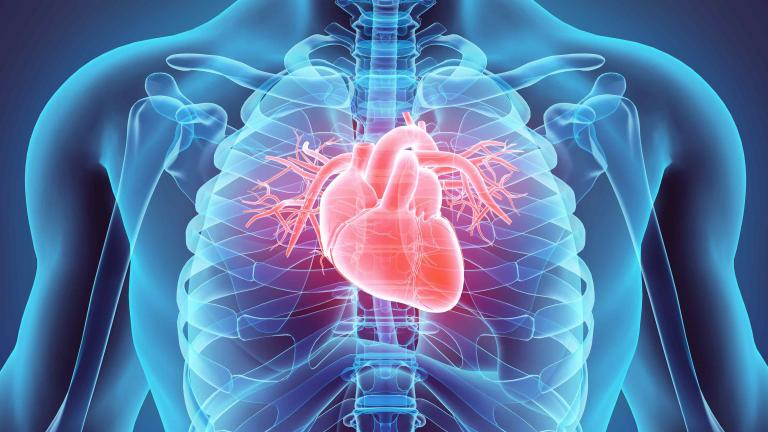

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The dataset includes 14 columns:
- age
- sex
- chest pain type (4 values; 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- target: presence of heart disease, 0 = False, 1 = True


In [2]:
#reading data
heart_data <- read_csv(file = "heart.csv")
heart_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Data Wrangling and Summarizing the Training Data ##

- In the beginning, we use the <code>map_df(is.na)</code> argument to see if there are any n/a variables inside our dataset.

In [3]:
#Check to see if there is any n/a value in the dataset
na_check <- heart_data |>
     map_df(is.na) |>
     map_df(sum)

na_check

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0


- We are going to select the <code>"age"</code>, <code>"sex"</code>, <code>"chol"</code>, <code>"trestbps"</code>, <code>"thalach"</code>, <code>"target"</code> columns that we are going to use.
- We want to rename those columns and give them an appropriate name.
- Since the dataset gives us numerical variables, so we would change them into categorical variables in which "1" represents "male" and "0" means "female".
- And also, we will change the determination of disease present from numerical value into categorical value in which "0" represents "false",  and "1" means "true".

In [4]:
#change to the variables into their true data type
heart_data  <- heart_data |>
    mutate(sex = as_factor(sex), target = as_factor(target)) |>
    select(age, sex, chol, trestbps, thalach, target)

#Rename columns
colnames(heart_data) <- c("age", "sex", "cholesterol", "rest_bp", "max_heart_rate", "disease_present")

# changes 1 to male and 0 to female
levels(heart_data$sex) <- c("female", "male")
# changes disease_present to true/false (0 = false, 1 = true)
levels(heart_data$disease_present) <- c(FALSE, TRUE)

heart_data

age,sex,cholesterol,rest_bp,max_heart_rate,disease_present
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
52,male,212,125,168,FALSE
53,male,203,140,155,FALSE
70,male,174,145,125,FALSE
⋮,⋮,⋮,⋮,⋮,⋮
47,male,275,110,118,FALSE
50,female,254,110,159,TRUE
54,male,188,120,113,FALSE


- Based on the data we use in the wrangling step, we have **1025** observations.
- We will use a random split of **0.75**, which will make 75% of the data split out into our training set, and the rest of 25% of the data will move to the testing set to find the model's accuracy in our prediction.
- We added the <code>set.seed()</code> argument to make our result reproducible and use the <code>initial_split()</code> argument to choose the sample from our data frame randomly.

In [5]:
set.seed(2106)
#spliting data into training set and testing set    
    
heart_split <- initial_split(heart_data, prop = 0.75, strata = disease_present)
heart_train <- training(heart_split)
heart_testing <- testing(heart_split)

- We begin our exploratory data analysis by summarizing those data into different types of tables.

In [10]:
heart_explore_counts <- heart_train |>
    group_by(disease_present) |>
    summarize(count = n(),
              percent = (n() / nrow(heart_train)) * 100)

heart_explore_counts

disease_present,count,percent
<fct>,<int>,<dbl>
FALSE,374,48.69792
TRUE,394,51.30208


- In the table above, we can see that it reports those observations in each class in which <code>"FALSE"</code> represents "no presence of heart disease", and <code>"TRUE"</code> means there is "presence of heart disease".
- We use <code>group_by(disease_present)</code> to group all rows by the disease_present in the data frame, and we use <code>n()</code> arguments to count the numbers observations in each class. 
- By comparing the training data, we observed that there are more cases of TRUE (presence of heart disease) than FALSE (no presence of heart disease) by 20 cases. 
- <code>"initial_split"</code>also ensures that the same proportion for testing set 
- The almost equal percentages of patient with heart disease and with no heart disease is beneficial because we can use it to fit the model effectively.

In [17]:
heart_explore <- heart_train |>
    group_by(sex, disease_present) |>
    summarize(count = n(),
              avg_chol = mean(cholesterol))

heart_explore

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,disease_present,count,avg_chol
<fct>,<fct>,<int>,<dbl>
female,FALSE,66,275.9091
female,TRUE,170,255.4941
male,FALSE,308,245.8474
male,TRUE,224,230.6518


- We use <code>group_by(sex, disease_present)</code> argument to find the relationship between sex and disease presence.
- In general, the training data have more male patients than female patients.
- The average cholesterol level also varies for each sex, male patients have higher chances to be diagnosed with heart condition with lower average cholesterol level compared to their female counterparts.


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

heart_rate_plot <- heart_train |>
    ggplot(aes(x = age, y = max_heart_rate, color = disease_present)) +
    geom_point() +
    labs(x = "Age", y = "Max Heart Rate", color = "Disease Present") +
    facet_grid(cols = vars (disease_present)) +
    theme(text = element_text(size = 15))

heart_rate_plot

- In here, we are trying to see whether having a higher max heart rate will increase the risk of having a heart disease. We can also assume that the younger/middle age group with high max heart rate a more prone to heart disease.

In [ ]:
cholesterol_plot <- heart_train |>
    ggplot(aes(x = cholesterol, fill = disease_present)) +
    geom_histogram() +
    labs(x = "Cholesterol", y = "Count", fill = "Disease Presence") +
    facet_grid(rows = vars (disease_present)) +
    theme(text = element_text(size = 15))

cholesterol_plot

- We wanted to see whether having high cholesterol will build up the risk factor from having a heart disease. According to the CDC, high cholesterol especially the "bad" type of cholesterol build up and block the vessels and inducing heart attack. However, from the graph above, it does not seem to support the claim. Cholesterol by itself could not be an accurate predictor for the presence of heart disease.

In [ ]:
restbp_plot <- heart_train |>
    ggplot(aes(x = rest_bp,fill = disease_present)) +
    geom_histogram(color = "black", position = "dodge") +
    labs(x = "Rest Blood Pressure", fill = "Disease Present") +
    facet_grid(rows = vars (disease_present)) +
    theme(text = element_text(size = 15))

restbp_plot


- We want to see whether higher restingblood pressure is associated with higher chance of getting heart disease. From the graph above, the presence of heart disease is relatively high when the resting blood pressure is above 120. 

All together, we want to try out the 4 variables age, maximum heart rate, resting blood pressure, and cholesterol as our predictor for our model. We will also do preprocessing steps to make sure that our training data is centered and scaled. Furthermore, we will also be tuning our K to avoid overfitting and underfitting.

## Predictor Variable Selection ##



In [ ]:

heart_subset <- heart_train |>
    select("age", "cholesterol", "rest_bp", "max_heart_rate", "disease_present")

names <- colnames(heart_subset|> select(-disease_present))

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_vfold <- vfold_cv(heart_subset, v = 5, strata = disease_present)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("disease_present", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies



## Tuning

In [ ]:
heart_recipe <- recipe(disease_present ~ age + rest_bp + cholesterol + max_heart_rate, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

vfold <- vfold_cv(heart_train, v = 10, strata = disease_present)

gridvals <- tibble(neighbors = seq(1, 25))

results <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_validation_plot <- results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(limits = c(1, 25), breaks = seq(1, 25), minor_breaks = seq(1, 25, 1))

cross_validation_plot

## KNN Classification Testing ##

In [ ]:
#Create the best KNN model
knn_spec_heart <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
                                   set_engine("kknn") |>
                                   set_mode("classification")

#Final recipe for centering and scaling                                    
knn_recipe_heart <- recipe(disease_present ~ cholesterol + max_heart_rate + age + rest_bp, data = heart_train) |>
                                   step_scale(all_predictors()) |>
                                   step_center(all_predictors())

#using workflow to combine the recipe and model
knn_fit_heart <- workflow() |>
    add_recipe(knn_recipe_heart) |>
    add_model(knn_spec_heart) |>
    fit(data = heart_train)
                                   
heart_test_prediction <- predict(knn_fit_heart, heart_testing) |>
                                   bind_cols(heart_testing) 
                                
                                
heart_test_prediction

heart_confusion_df <- heart_test_prediction |>
    conf_mat(truth = disease_present, estimate = .pred_class)

heart_confusion_df

heart_accuracy <- heart_test_prediction |>
    metrics(truth = disease_present, estimate = .pred_class) |>
                                   select(.metric, .estimate) |>
                                   head(1)
heart_accuracy

## References

https://www.cdc.gov/cholesterol/myths_facts.htm